**Setup**

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from nltk.text import Text 
from nltk import FreqDist
from nltk.corpus import wordnet as wn
import nltk
import re

from nltk.corpus import inaugural
from collections import Counter

from nltk import CFG
from nltk.tree import Tree

# Problem 1 (25%)
Use the text of the Universal Declaration of Human Rights (UDHR). Create a table for 5 languages in which you will collect statistics about the languages used. Place in that table the number of words in each language in UDHR, number of unique words, average length of words, number of sentences contained in UDHR and average number of words per sentence. Create a distribution of sentence lengths for each language. Plot those (non-cumulative) distributions on one diagram. 

### Import text 
Import the UDHR text and show some of the available languages.

In [2]:
from nltk.corpus import udhr
udhr.fileids()[100:110]

[u'HaitianCreole_Popular-Latin1',
 u'Hani-Latin1',
 u'Hausa_Haoussa-Latin1',
 u'Hawaiian-UTF8',
 u'Hebrew_Ivrit-Hebrew',
 u'Hebrew_Ivrit-UTF8',
 u'Hiligaynon-Latin1',
 u'Hindi-UTF8',
 u'Hindi_web-UTF8',
 u'Hmong_Miao-Sichuan-Guizhou-Yunnan-Latin1']

### Select languages
I'm selecting 5 languages, those are English, German, French, Czech and Spanish.

In [3]:
languages = ['English-Latin1', 'German_Deutsch-Latin1', 'French_Francais-Latin1',
             'Czech-Latin2', 'Spanish-Latin1']

### Statistics 
In order to calculate the statistics we have to loop trough the languages and extract the different values.


In [4]:
# Define NP object
np_udhr=[]

# Loop trough languages
for i in languages:
    # Get statistics
    n_char = len(udhr.raw(i))
    n_words = len(udhr.words(i))
    n_sents = len(udhr.sents(i))
    n_unique = len(set(udhr.words(i)))
    mean_word_length = round(n_char/n_words)
    mean_n_words_sents = round(n_words/n_sents)
    
    # Define array
    np_stat = [i, n_words, n_unique, n_sents,
               mean_word_length, mean_n_words_sents]
    np_udhr.append(np_stat)

Next we can output the calculated values

In [5]:
df_stat = pd.DataFrame(np_udhr, columns=['Language', 'Word Count',
                                         'Word Count Unique',
                                         'Number of Sentences',
                                         'Word Length (Mean)',
                                         'Words Per Sentence (Mean)'])    
df_stat

,Language,Word Count,Word Count Unique,Number of Sentences,Word Length (Mean),Words Per Sentence (Mean)
0,English-Latin1,1781,533,67,5.0,26.0
1,German_Deutsch-Latin1,1521,579,60,6.0,25.0
2,French_Francais-Latin1,1935,567,57,5.0,33.0
3,Czech-Latin2,1972,785,72,5.0,27.0
4,Spanish-Latin1,1763,542,58,5.0,30.0


### Distribution
Next we're creating a conditional frequency distribution of the different sentence lengths for each individual language from above. 

In [6]:
cfd = nltk.ConditionalFreqDist(
            (lang, len(sent))
            for lang in languages
            for sent in udhr.sents(lang))

### Visualize data
We can visualize the data either trough a sample table or a cfd plot.

In [7]:
cfd.tabulate(conditions=languages, samples=range(10), cumulative=False)

                       0 1 2 3 4 5 6 7 8 9 
        English-Latin1 0 0 0 0 2 0 1 0 0 1 
 German_Deutsch-Latin1 0 0 0 1 0 1 0 0 1 2 
French_Francais-Latin1 0 0 0 0 1 0 0 1 0 0 
          Czech-Latin2 0 0 0 0 2 1 1 0 1 0 
        Spanish-Latin1 0 0 0 1 0 0 1 0 1 0 


Next we're plotting the data.

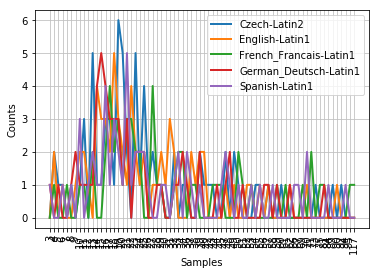

In [8]:
cfd.plot(cumulative=False)

# Problem 2 (25%)
Identify 10 most frequently used words longer than 7 characters in the entire corpus of Inaugural Addresses. Do not identify 10 words for every speech but rather 10 words for the entire corpus. Which among those words has the largest number of synonyms? List all synonyms for those 10 words. Which one of those 10 words has the largest number of hyponyms? List all hyponyms of those 10 most frequently used “long” words. The purpose of this problem is to familiarize you with WordNet and concepts of synonyms and hyponyms.

### Load words
First we're loading all the words from the inaugural corpus. 

In [9]:
np_words = nltk.corpus.inaugural.words(nltk.corpus.inaugural.fileids())

### Filter
Next we can limit the length of the words to 7 characters and identify the 10 most frequently used words. With that we can seperate the words and values.

In [10]:
# Filter
filt_char = ([w.lower() for w in np_words if len(w) > 7])

# Frequency distribution
f_dist = FreqDist(filt_char)
freq = f_dist.most_common(10)

# Creaty empty arrays
np_1 = []
np_2 = []

# Seperate words
for i in range(10):
    np_1.append(freq[i][0])

for i in range(10):
    np_2.append(freq[i][1])

# Create dataframe
df_freq = pd.DataFrame({'Top 3':np_1, 'n':np_2})

### Show data
With that we can print the top 10 words and their number of occurrences.

In [11]:
df_freq

,Top 3,n
0,government,593
1,citizens,237
2,constitution,205
3,national,154
4,american,147
5,congress,129
6,interests,113
7,political,106
8,executive,97
9,principles,93


As we can see above, governement appears the most often from the top 10 words and principles the least.

### Synonyms
Next we can get synomyns for all the words. We're printing all the synonyms for the words.

In [12]:
# Create array
np_syn = []

# Loop trough distribution
for i in f_dist.most_common(10):
    # Print word
    print 'Word: ', i[0]
    count=0
    
    # Print synonym
    print 'Synonymns: '
    for j in wn.synsets(i[0]):
        print '  ',j.lemma_names()
        count+=len(j.lemma_names())
    np_syn.append([i[0], count])       

Word:  government
Synonymns: 
   [u'government', u'authorities', u'regime']
   [u'government', u'governing', u'governance', u'government_activity', u'administration']
   [u'government']
   [u'politics', u'political_science', u'government']
Word:  citizens
Synonymns: 
   [u'citizen']
Word:  constitution
Synonymns: 
   [u'fundamental_law', u'organic_law', u'constitution']
   [u'constitution', u'establishment', u'formation', u'organization', u'organisation']
   [u'United_States_Constitution', u'U.S._Constitution', u'US_Constitution', u'Constitution', u'Constitution_of_the_United_States']
   [u'constitution', u'composition', u'physical_composition', u'makeup', u'make-up']
   [u'Constitution', u'Old_Ironsides']
Word:  national
Synonymns: 
   [u'national', u'subject']
   [u'national']
   [u'national']
   [u'national']
   [u'national']
   [u'home', u'interior', u'internal', u'national']
   [u'national']
   [u'national']
Word:  american
Synonymns: 
   [u'American']
   [u'American_English', u'A

In [13]:
# Creaty empty arrays
np_1 = []
np_2 = []

# Get synonyms
for i in range(10):
    np_1.append(np_syn[i][0])

for j in range(10):
    np_2.append(np_syn[j][1])

# Create dataframe
df_syn = pd.DataFrame({'Top 3':np_1, 'n':np_2})

The top 10 words with its synonym counts are:

In [14]:
df_syn.sort_values(by="n", ascending=False)

,Top 3,n
6,interests,21
2,constitution,20
5,congress,17
0,government,12
3,national,12
9,principles,10
4,american,7
8,executive,6
7,political,3
1,citizens,1


As we can see above, interests appears to have the most synonyms and citizens the least.

### Hyponyms
We're next listing all the hyponyms of those 10 most frequently used words. The goal is to find the largest numberof hyponyms.

In [15]:
# Create array
np_hyp = []

# Loop trough distribution
for i in f_dist.most_common(10):
    # Print word
    print 'Word: ', i[0]
    count=0
    
    # Print Hyponyms
    print 'Hyponyms: '
    for j in wn.synsets(i[0]):
        print j
        print j.hyponyms()
        count+= len(j.hyponyms())
    np_hyp.append([i[0], count])

Word:  government
Hyponyms: 
Synset('government.n.01')
[Synset('ancien_regime.n.01'), Synset('authoritarian_state.n.01'), Synset('bureaucracy.n.02'), Synset('court.n.03'), Synset('downing_street.n.02'), Synset('empire.n.02'), Synset('federal_government.n.01'), Synset('government-in-exile.n.01'), Synset('local_government.n.01'), Synset('military_government.n.01'), Synset('palace.n.02'), Synset('papacy.n.01'), Synset('puppet_government.n.01'), Synset('state.n.03'), Synset('state_government.n.01'), Synset('totalitarian_state.n.01')]
Synset('government.n.02')
[Synset('legislation.n.02'), Synset('misgovernment.n.01'), Synset('trust_busting.n.01')]
Synset('government.n.03')
[]
Synset('politics.n.02')
[Synset('geopolitics.n.01'), Synset('realpolitik.n.01')]
Word:  citizens
Hyponyms: 
Synset('citizen.n.01')
[Synset('active_citizen.n.01'), Synset('civilian.n.01'), Synset('freeman.n.01'), Synset('private_citizen.n.01'), Synset('repatriate.n.01'), Synset('thane.n.02'), Synset('voter.n.01')]
Word:

In [16]:
# Creaty empty arrays
np_1 = []
np_2 = []

# Get synonyms
for i in range(10):
    np_1.append(np_hyp[i][0])

for j in range(10):
    np_2.append(np_hyp[j][1])

# Create dataframe
df_hyp = pd.DataFrame({'Top 3':np_1, 'n':np_2})

The top 10 words with hyponyms are:

In [17]:
df_hyp.sort_values(by="n", ascending=False)

,Top 3,n
4,american,75
9,principles,35
6,interests,27
0,government,21
8,executive,15
2,constitution,10
1,citizens,7
5,congress,6
3,national,3
7,political,0


As can be seen above, the word american has the most hyponyms and policial the least amount.

# Problem 3 (10%)
Create your own grammar for the following sentence: 
"Describe every step of your work and present all intermediate and final results in a Word document". 

### Create and split
We're first creating and splitting the above sentence

In [19]:
text = """Describe every step of your work and present all intermediate 
          and final results in a Word document"""
sentence = text.split()

### Output
Next we can print the sentence.

In [20]:
print sentence

['Describe', 'every', 'step', 'of', 'your', 'work', 'and', 'present', 'all', 'intermediate', 'and', 'final', 'results', 'in', 'a', 'Word', 'document']


### Define grammar
Next we're defining a context free grammar for the above sentence.

In [21]:
# define a simple context-free grammar.
grammar = CFG.fromstring("""
                            S -> VP | VP Cnj VP
                            VP -> V NP | V PP
                            NP -> Det N | Det N PP | Adj N | Adj N PP
                            PP -> P NP  
                            N -> 'step' | 'work' | 'results' | 'Word' 'document'
                            P -> 'in' | 'of' | 'all'
                            V -> 'Describe' | 'present'
                            Det -> 'an' | 'my' | 'every' | 'your' | 'a'
                            Adj -> 'intermediate' | 'final' | Adj Cnj Adj
                            Cnj -> 'and' | 'or' 
                        """)


### Parse and print tree
Next we can parse and print the above tree

In [22]:
# Parse
par_grammar = nltk.ChartParser(grammar, trace=0)
par_trees = par_grammar.parse(sentence)

# Print
for i in par_trees:
    print i

(S
  (VP
    (V Describe)
    (NP (Det every) (N step) (PP (P of) (NP (Det your) (N work)))))
  (Cnj and)
  (VP
    (V present)
    (PP
      (P all)
      (NP
        (Adj (Adj intermediate) (Cnj and) (Adj final))
        (N results)
        (PP (P in) (NP (Det a) (N Word document)))))))


# Problem 4 (20%)
Install and compile Word2Vec C executables. Train CBOW model and create 200 dimensional embedding of Word Vectors. Demonstrate that you could run analogical reasoning when searching for country’s favorite food starting with japan and sushi. Note that words might have to be in lower case. Find favorite food for 5 different countries. Report improbable results as well as good results. Use scripts provided with original Google C code. 

### Download
I downloaded the Word2Vec C executables from the following github repository by William Yeh to my EC2 Ubuntu instance. Somehow I wasn't able to install Word2Vec directly. The nice thing about the code in the repository by Yeh is, that it has a make file can can be easily compiled.

```bash
git clone https://github.com/William-Yeh/word2vec-mac.git
```

```text
Cloning into 'word2vec-mac'...
remote: Counting objects: 123, done.
remote: Total 123 (delta 0), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (123/123), 111.30 KiB | 0 bytes/s, done.
Resolving deltas: 100% (97/97), done.
Checking connectivity... done.
```

### Installation
Next I compiled the word2vec program. As explained above, installation trough pip somewho failed.

```bash
cd word2vec-mac/
make
```

```text
gcc word2vec.c -o word2vec -lm -pthread -Ofast -march=native -Wall \
    -funroll-loops -Wno-unused-result
gcc word2phrase.c -o word2phrase -lm -pthread -Ofast -march=native \
    -Wall -funroll-loops -Wno-unused-result
gcc distance.c -o distance -lm -pthread -Ofast -march=native -Wall \
    -funroll-loops -Wno-unused-result
gcc word-analogy.c -o word-analogy -lm -pthread -Ofast -march=native \
    -Wall -funroll-loops -Wno-unused-result
gcc compute-accuracy.c -o compute-accuracy -lm -pthread -Ofast \
    -march=native -Wall -funroll-loops -Wno-unused-result
```

### Train model
I next trained a neural net using a CBOW model and created 200 dimensional embeddings of word vectors. This was done using the demo-words.sh, using the text8 as the training data. I entered Japan and Sushi as words.

```bash
chmod +x *.sh
./demo-word.sh
```

```text
make: Nothing to be done for 'all'.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.8M  100 29.8M    0     0  1913k      0  0:00:16  0:00:16 --:--:-- 1963k
Archive:  text8.zip
  inflating: text8
Starting training using file text8
Vocab size: 71290
Words in train file: 16718843
Alpha: 0.000121  Progress: 99.58%  Words/thread/sec: 97.71k
real    1m30.997s
user    2m54.924s
sys     0m0.236s
Enter word or sentence (EXIT to break): japan

Word: japan  Position in vocabulary: 582

                                              Word       Cosine distance
------------------------------------------------------------------------
                                             china              0.666397
                                             korea              0.584256
                                         singapore              0.572973
                                          cambodia              0.563123
...
```

```text
Enter word or sentence (EXIT to break): sushi

Word: sushi  Position in vocabulary: 30906

                                              Word       Cosine distance
------------------------------------------------------------------------
                                             dashi              0.726945
                                              tofu              0.723628
                                         glutinous              0.705772
                                           steamed              0.696959
...
```

### Demo phrases
I also looked at the file demo phrases.

```bash
./demo-phrases.sh
```

```text
Starting training using file text8
Words processed: 17000K     Vocab size: 4399K
Vocab size (unigrams + bigrams): 2419827
Words in train file: 17005206
Words written: 17000K
real    0m24.892s
user    0m23.432s
sys     0m0.760s
Starting training using file text8-phrase
Vocab size: 84069
Words in train file: 16307293
Alpha: 0.000117  Progress: 99.60%  Words/thread/sec: 40.23k
real    3m29.039s
user    6m49.088s
sys     0m0.264s
Enter word or sentence (EXIT to break):
```

i entered sushi japan germany

```text
Enter word or sentence (EXIT to break): japan sushi germany

Word: japan  Position in vocabulary: 547

Word: sushi  Position in vocabulary: 32615

Word: germany  Position in vocabulary: 319

                                              Word       Cosine distance
------------------------------------------------------------------------
                                  exports_partners              0.509551
                                            russia              0.486049
                                             italy              0.485402
                                            france              0.481288
...
```

The closest word to the above search is exports_partners, followed by Russia and Italy.

### Word Analogy
Next I run demo-analogy.sh in order to find the food analogies. Japan susi is used as the analogy. I tried to find the favorite foods for Germany, France, Italy, Spain and USA. 

```bash
./demo-analogy.sh 
```

```text
tim@ip-172-31-24-35:~/word2vec-mac$ ./demo-analogy.sh
make: Nothing to be done for 'all'.
----------------------------------------------------------
Note that for the word analogy to perform well, the models
should be trained on much larger data sets
Example input: paris france berlin
----------------------------------------------------------
Starting training using file text8
Vocab size: 71290
Words in train file: 16718843
Alpha: 0.000121  Progress: 99.58%  Words/thread/sec: 98.08k
real    1m30.090s
user    2m54.356s
sys     0m0.252s
Enter three words (EXIT to break):
```

#### Germany

```text
Enter three words (EXIT to break): japan sushi germany

Word: japan  Position in vocabulary: 582

Word: sushi  Position in vocabulary: 30906

Word: germany  Position in vocabulary: 324

                                              Word              Distance
------------------------------------------------------------------------
                                           turnips              0.521571
                                           cabbage              0.521392
                                            glazed              0.516707
                                              hams              0.512228
...
```

#### France

```text
Enter three words (EXIT to break): japan sushi france

Word: japan  Position in vocabulary: 582

Word: sushi  Position in vocabulary: 30906

Word: france  Position in vocabulary: 303

                                              Word              Distance
------------------------------------------------------------------------
                                          omelette              0.551152
                                           grilled              0.541595
                                           caramel              0.537879
                                            breads              0.536886
...
```

#### Italy

```text
Enter three words (EXIT to break): japan sushi italy

Word: japan  Position in vocabulary: 582

Word: sushi  Position in vocabulary: 30906

Word: italy  Position in vocabulary: 843

                                              Word              Distance
------------------------------------------------------------------------
                                          omelette              0.542516
                                              tofu              0.541085
                                            cooked              0.538601
                                           lettuce              0.538252
...
```

#### Spain

```text
Enter three words (EXIT to break): japan sushi spain

Word: japan  Position in vocabulary: 582

Word: sushi  Position in vocabulary: 30906

Word: spain  Position in vocabulary: 804

                                              Word              Distance
------------------------------------------------------------------------
                                           caramel              0.539891
                                            breads              0.527792
                                           savoury              0.525772
                                           paprika              0.523075
...
```

#### USA

```text
Enter three words (EXIT to break): japan sushi usa

Word: japan  Position in vocabulary: 582

Word: sushi  Position in vocabulary: 30906

Word: usa  Position in vocabulary: 1164

                                              Word              Distance
------------------------------------------------------------------------
                                         raspberry              0.532414
                                             crepe              0.530286
                                          shallots              0.527220
                                             kodak              0.525473
...
```

According to the word analogy the favorite foods are:

* Germany: Turnips & Cabbage
* France: Omellete & Grilled
* Italy: Omellete & Tofu
* Spain: Caramel & Breads
* USA: Rasperry & Crepe

<br>
The resulting foods do make sense to a certain degree and belong to the country in question. However, in most cases, one would expect different results. Such as Burgers for the USA, Sausages for Germany, Pasta for Italy or Tapas for Spain. The reason for the results is that we're limited on the small training set in the text8 file. 

# Problem 5 (20%)
Install and run Genism Python Word2Vec API. Find the most probable words you will obtain when you start with an emperor add a woman and subtract a man. Use this tutorial as a guide https://rare-technologies.com/word2vec-tutorial/

**Note:** Somehow the installation didn't work under python 2.7. I didn't have jupyter notebook installed for python 3. That is why I executed the following steps directly in the shell.

### Install gensim
First we can start by installing gensim in the bash terminal.

```bash
pip3 install -U gensim
```

### Get file from 
It is possible to download the text8 corpus used (see comments, in the rare-technologies tutorial.

```bash
wget http://mattmahoney.net/dc/text8.zip
unzip text8.zip
```

Next I opened python3 and did the following analyis in the shell.

```python
# import gensim
import gensim, logging
from gensim.models import word2vec

# open text8
sentences = word2vec.Text8Corpus('text8')

# build the model with vector size 2
model = word2vec.Word2Vec(sentences, size=200)

# Run query
top_5 = model.most_similar(positive=['emperor', 'woman'],
                           negative=['man'], topn=5)
```

Next we can output the words

```python
# Print list
for word in top_5:
     print(word)
```


```text
>>> for word in top_5:
...     print(word)
...
('empress', 0.6854598522186279)
('emperors', 0.6028348207473755)
('ruler', 0.5929163694381714)
('augustus', 0.5781252384185791)
('daughter', 0.5724169015884399)
```

The most likely words are empress, emperors, ruler, augustus and daughter.